In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [2]:
X = data.iloc[:, 0:13].values
y = data.iloc[:, 13].values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [5]:
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0

In [7]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.5009290

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.4229

In [9]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [17]:
eig_pairs

[(4.732436977583594,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645123,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464681,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.9241658668248736,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371109,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, 

In [18]:
eig_pairs.sort()
eig_pairs.reverse()

In [19]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1), 
                      eig_pairs[1][1].reshape(13,1)))

print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[-0.1443294 ,  0.48365155],
       [ 0.24518758,  0.22493093],
       [ 0.00205106,  0.31606881],
       [ 0.23932041, -0.0105905 ],
       [-0.14199204,  0.299634  ],
       [-0.39466085,  0.06503951],
       [-0.4229343 , -0.00335981],
       [ 0.2985331 ,  0.02877949],
       [-0.31342949,  0.03930172],
       [ 0.0886167 ,  0.52999567],
       [-0.29671456, -0.27923515],
       [-0.37616741, -0.16449619],
       [-0.28675223,  0.36490283]]))


In [20]:
Y = X_std.dot(matrix_w)

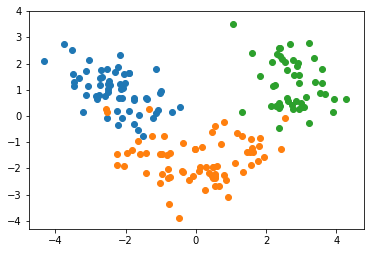

In [27]:
traces = []

for name in range(1, 4):

    trace = plt.scatter(
        x=Y[y==name,0],
        y=Y[y==name,1])
    traces.append(trace)
plt.figure(figsize=(15, 25))
#Figure(data=dataset, layout=layout)
plt.show()